# Coursera Capstone Project — The Battle of Neighbourhood

## Introducation
***

## The objective of this final project is to apply the learned tools to define a business problem or study an interesting idea, by searching for data in the web and, using Foursquare location data to compare different districts(choice of city depends on the students, I choose to explore Chicago). For instantce, to figure out which venue is suitable for starting a new business(say expand your business or open a new restaurant). For this final report, I go through the problem designing, data preparation and final analysis section step by step. Detailed codes and images are given in below.

### 1. Discussion and Background of the Business Problem:
### I decide to explore more about the City of Chicago(similar ideas can be applied to any other cities. ), which is the largest city in Illinois and the third most-populous city in the nation. There are a lot of job opportunities and fine place like museums, good restaurants to visit when you are free. What I am interested in this problem is the following: suppose you are new to Chicago and want to find nice place to go around and try some good restaurant nearby, or similarly if you want to expand your business(say restaurant in this specific case) around the top visited site in Chicago. Certainly there lot of Apps for you do a quick search, but it is really cool if I can work it out by myself and apply what I learned from IBM data science course.

###  We will go through each step of this project and address them separately. Let me first outline the initial data preparation and describe future steps to start the battle of neighborhoods in Chicago.

### Who will be interested in this project?
Firstly, for the people new to Chicago and wants to explore more about top visited sites in Chicago.

Secondly, for people who wants to invest or open a restaurant. This analysis will be a comprehensive guide to start or expand restaurants targeting the large pool of visits in Chicago.

Thirdly, Freelancer who loves to have their own restaurant as a side business. This analysis will give an idea, how beneficial it is to open a restaurant and what are the pros and cons of this business.




### <font color=red>So the question is to visit or open a new restaurant around the top visited sites in Chicago?</font>
***

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Download and Explore Dataset</a>

2. <a href="#item2">Visualization and Data Exploration:</a>

3. <a href="#item3">Analyze Each Venues</a>

4. <a href="#item4">Cluster Venuss</a>
 
5. <a href="#item5">Results and discussion</a>    
  
</font>
</div>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
!conda install -c anaconda beautifulsoup4 --yes
from bs4 import BeautifulSoup
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge

The following packages will be UPDATED:

    certifi: 2019.6.16-py36_1 anaconda --> 2019.6.16-py36_1  conda-forge

The following packages will be DOWNGRADED:

    openssl: 1.1.1-h7b6447c_0 anaconda --> 1.1.1c-h516909a_0 conda-forge


certifi-2019.6.16    | 149 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done


==> WARNING: A newer

In [2]:
# All the SciKit Learn Libraries Required
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

def cross_validate(model, n_splits = 10):
    
    k_fold = KFold(n_splits = n_splits)
    scores = [model.fit(X[train], y[train]).score(X[test], y[test]) for train, test in k_fold.split(X)]
    
    scores = np.percentile(scores, [40, 50, 60])
    return scores


## 1. Download and Explore Dataset

## 1.1 Using FourSquare to get the top 30 places to visit in Chicago
FourSquare does not actually provide an API that will return a list of the top venues to visit in a city. 
To get this list we can though use the FourSquare website directly to request the top sites in Chicago and then use BeautifulSoup to scrape the data we need. Once we have this starting data the other supplemental data we need to complete this dataset can be retrieved from using the FourSquare Venue API.
(And that my free API alrealy used up and I will not run it here.)

I first make use of requests and  Beautifulsoup4 library to scrap the top 30 rated sites in Chicago to create a data-frame.


## Define Foursquare Credentials and Version

In [3]:
CLIENT_ID = 'GZQPDHGHCSLOTGWYEBAC01KZZJLTQ2E3XG3NMJ5XDYYQBQCQ' # your Foursquare ID
CLIENT_SECRET = 'MGRDIIR3CRFN5UMYTTEW1NNTWVCLOD3Z0AXRFYIH15BIUENH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GZQPDHGHCSLOTGWYEBAC01KZZJLTQ2E3XG3NMJ5XDYYQBQCQ
CLIENT_SECRET:MGRDIIR3CRFN5UMYTTEW1NNTWVCLOD3Z0AXRFYIH15BIUENH


In [4]:
# Use the Requests get method to request the top sites in Chicago
# page = requests.get(
#     "https://foursquare.com/explore?mode=url&near=Chicago%2C%20IL%2C%20United%20States&nearGeoId=72057594042815334&q=Top%20Picks")

# # Convert the HTML response into a BeautifulSoup Object
# soup = BeautifulSoup(page.content, 'html.parser')

# # Use the BeautifulSoup find_all method to extract each top site venue details.
# top_venues = soup.find_all('div', class_='venueDetails')


In [5]:
# # The column names for the top venues dataframe
# venue_columns = ['id', 
#                  'score', 
#                  'category', 
#                  'name',
#                  'latitude', 
#                  'longitude']

# # Create the empty top venues dataframe
# df_top_venues = pd.DataFrame(columns=venue_columns)

# # For each venue in the BeautifulSoup HTML object
# for venue in top_venues:
    
#     # Extract the available attributes
#     venue_name = venue.find(target="_blank").get_text()
#     venue_score = venue.find(class_="venueScore positive").get_text()
#     venue_cat = venue.find(class_="categoryName").get_text()
#     venue_id = venue_href.split('/')[-1]

#     if 'promotedTipId' in venue_id: 
#         continue
        
#     # Contruct the FourSquare venue API URL
#     url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
#         venue_id, 
#         CLIENT_ID,
#         CLIENT_SECRET,
#         VERSION)
    
#     # Request the venue data
#     result = requests.get(url).json()
        

#     venue_city = result['response']['venue']['location']['city']
#     venue_latitude = result['response']['venue']['location']['lat']
#     venue_longitude = result['response']['venue']['location']['lng']
    
#     # Add the venue to the top venues dataframe
#     df_top_venues = df_top_venues.append({'id': venue_id,
#                                           'score': venue_score,
#                                           'category': venue_cat,
#                                           'name': venue_name,
#                                           'latitude': venue_latitude,
#                                           'longitude': venue_longitude}, ignore_index=True)

# df_top_venues.head()

In [6]:
# # The score type needs to be converted to float
# df_top_venues['score'] = pd.to_numeric(df_top_venues['score'], errors='coerce').fillna(0)

# # Describe the score to see if there is nuch variance in the values
# df_top_venues.score.describe()
# # Verify the shape of the top venues dataframe
# print('shape of the dataframe:', df_top_venues.shape)
# print('the dtypes of the top venues dataframe', df_top_venues.dtypes)
# df_top_venues.to_csv('df_top_venus.csv')


## The top 30 visited sited in Chicago data are saved and will be showing in the below

In [7]:
df_top_venues = pd.read_csv('df_top_venues.csv')
df_top_venues = df_top_venues.drop(columns=['Unnamed: 0', 'city', 'href'])
df_top_venues.head(5)


,id,score,category,name,latitude,longitude
0,42b75880f964a52090251fe3,9.6,Park,Millennium Park,41.882627,-87.623336
1,49e9ef74f964a52011661fe3,9.6,Art Museum,The Art Institute of Chicago,41.879609,-87.623572
2,4c47533649fa9521cb1f5e62,9.5,Park,Grant Park,41.876626,-87.619263
3,4b9d15c5f964a520478e36e3,9.5,Waterfront,Chicago Riverwalk,41.887280,-87.627217
4,4adfca6df964a520777d21e3,9.5,Concert Hall,Symphony Center (Chicago Symphony Orchestra),41.879275,-87.624680


## I will focus on the top 5 sites

In [9]:
df_top_5venues = df_top_venues.iloc[0:5,:]
list_top_5venues= df_top_5venues['name'].tolist()
list_top_5venues 

['Millennium Park',
 'The Art Institute of Chicago',
 'Grant Park',
 'Chicago Riverwalk',
 'Symphony Center (Chicago Symphony Orchestra)']

***

## 1.2 FourSquare to query Restaurant Data
Now search for the restaurant around each top 30 venues within 1km radius. Using FourSquare categoryID that represents all food venues,the requests returns a JSON object which can then be queried further for the restaurant details.

In [10]:
# # The column names for the restaurants dataframe
# restaurants_columns = ['id',
#                        'score', 
#                        'category', 
#                        'categoryID', 
#                        'name', 
#                        'address',
#                        'latitude',
#                        'longitude', 
#                        'venue_name', 
#                        'venue_latitude',
#                        'venue_longitude']

# # Create the empty top venues dataframe
# df_restaurant = pd.DataFrame(columns=restaurants_columns)

# # Create a list of all the top venue latitude and longitude
# top_venue_lats = df_top_venues['latitude'].values
# top_venue_lngs = df_top_venues['longitude'].values

# # Create a list of all the top venue names
# top_venue_names = df_top_venues['name'].values

# # Iterate over each of the top venues
# # The venue name, latitude and longitude are passed to the loop
# for ven_name, ven_lat, ven_long in zip(top_venue_names, top_venue_lats, top_venue_lngs):
    
#     # Configure additional Search parameters
#     # This is the FourSquare Category Id for all food venues
#     categoryId = '4d4b7105d754a06374d81259'
#     radius = 1000
#     limit = 50
    
#     # Contruct the FourSquare search API URL
#     url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
#         CLIENT_ID,
#         CLIENT_SECRET,
#         ven_lat,
#         ven_long,
#         VERSION,
#         categoryId,
#         radius,
#         limit)
    
#     # Make the search request
#     results = requests.get(url).json()
    
#     # Want a good selection of Restaurents
#     # If less than 10 are returned ignore
#     if len(results['response']['venues']) < 10:
#         continue
        
#     # Populate the new dataframe with the list of restaurants
#     # Get the values for each Restaurant from the JSON
#     for restaurant in results['response']['venues']:
 
#         # Sometimes the Venue JSON is missing data. If so ignore and continue
#         try:
#             # Get location details
#             rest_id = restaurant['id']
#             rest_category = restaurant['categories'][0]['pluralName']
#             rest_categoryID = restaurant['categories'][0]['id']
#             rest_name = restaurant['name']
#             rest_address = restaurant['location']['address']
#             rest_latitude = restaurant['location']['lat']
#             rest_longitude = restaurant['location']['lng']
            
#             # Contruct the FourSquare venue API URL to get the venues rating / score
#             rest_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
#                 rest_id, 
#                 CLIENT_ID,
#                 CLIENT_SECRET,
#                 VERSION)

#             # Get the restaurant score and href
#             result = requests.get(rest_url).json()
#             rest_score = result['response']['venue']['rating']
            
#             # Add the restaurant details to the dataframe
#             df_restaurant = df_restaurant.append({'id': rest_id,
#                                                   'score': rest_score,
#                                                   'category': rest_category,
#                                                   'categoryID': rest_categoryID,
#                                                   'name': rest_name,
#                                                   'address': rest_address,
#                                                   'latitude': rest_latitude,
#                                                   'longitude': rest_longitude,
#                                                   'venue_name': ven_name,
#                                                   'venue_latitude': ven_lat,
#                                                   'venue_longitude': ven_long}, ignore_index=True)
            
#         # If there are any issue with a restaurant ignore and continue
#         except:
#             continue
# Verify the dtypes of the restaurants dataframe
# print('dtypes of the restaurants', df_restaurant.dtypes)



# Which restaurants have to highest average score
# df_restaurant.groupby('category')['score'].mean().sort_values(ascending=False)[:10]
# df_restaurant.to_csv('restaurant.csv')

In [11]:
restaurant = pd.read_csv('restaurant.csv')
restaurant = restaurant.drop(columns=['Unnamed: 0','id', 'categoryID', 'postalcode', 'city'])
restaurant.head()

,score,category,name,address,latitude,longitude,venue_name,venue_latitude,venue_longitude
0,7.8,Coffee Shops,Starbucks,8 N. Michigan Avenue,41.882478,-87.624701,Millennium Park,41.882627,-87.623336
1,8.1,American Restaurants,Remington's,20 N Michigan Ave,41.882628,-87.624608,Millennium Park,41.882627,-87.623336
2,8.2,Bakeries,Panera Bread,2 N Michigan Ave,41.882273,-87.624795,Millennium Park,41.882627,-87.623336
3,8.4,Burger Joints,Shake Shack,12 S Michigan Ave,41.881673,-87.624455,Millennium Park,41.882627,-87.623336
4,8.9,Gastropubs,The Gage,24 S Michigan Ave,41.881202,-87.624481,Millennium Park,41.882627,-87.623336


In [12]:
# What are the top 10 most frequently occuring restaurant types
top_10_restaurant = restaurant.groupby('category')['name'].count().sort_values(ascending=False)[:10]
#top_10_restaurant_list = top_10_restaurant.tolist()
top_10_restaurant = top_10_restaurant.reset_index()
top_10_list = top_10_restaurant['category'].tolist()
top_10_list

['Coffee Shops',
 'New American Restaurants',
 'Pizza Places',
 'Bakeries',
 'Italian Restaurants',
 'American Restaurants',
 'Cafés',
 'Sandwich Places',
 'Fast Food Restaurants',
 'Mexican Restaurants']

In [13]:
# Restaurant around top 5 rated sites in chicago
restaurant = restaurant[restaurant['venue_name'].isin(list_top_5venues)]
restaurant = restaurant[restaurant['category'].isin(top_10_list)]
restaurant.head()

,score,category,name,address,latitude,longitude,venue_name,venue_latitude,venue_longitude
0,7.8,Coffee Shops,Starbucks,8 N. Michigan Avenue,41.882478,-87.624701,Millennium Park,41.882627,-87.623336
1,8.1,American Restaurants,Remington's,20 N Michigan Ave,41.882628,-87.624608,Millennium Park,41.882627,-87.623336
2,8.2,Bakeries,Panera Bread,2 N Michigan Ave,41.882273,-87.624795,Millennium Park,41.882627,-87.623336
5,9.2,New American Restaurants,Cindy's,12 S Michigan Ave,41.881695,-87.624600,Millennium Park,41.882627,-87.623336
6,8.7,Bakeries,Toni Patisserie & Café,65 E Washington St,41.883237,-87.625362,Millennium Park,41.882627,-87.623336


## 2. Visualization and Data Exploration

### Next, create a leaflet map with Folium to see the distribution of the most visited restaurants in the 5 top rated sites.

In [17]:
address = 'Chicago, IL'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago are 41.8755616, -87.6244212.


In [18]:
# create map of Manhattan using latitude and longitude values
Chicago = folium.Map(location=[latitude, longitude], zoom_start=13, tiles='openstreetmap')

color = ['red', 'blue', 'lime', 'purple', 'green']

# add markers to map
for lat, lng, cat, venue in zip(restaurant['latitude'], restaurant['longitude'], restaurant['category'],restaurant['venue_name']):
    label = folium.Popup(str(cat)+' '+ str(venue), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color[list_top_5venues.index(venue)-1],
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Chicago)  
    
Chicago

### Circular marks represent the most frequently visited restaurants in the top 5 venues (Millennium Park- Red, The Art Institute of Chicago- BLue, Grant Park- Lime, Chicago Riverwalk- Purple, Symphony Center- Green) according to Foursquare data.


### Next plot shows the top 10 restaurant around top 5 venues.

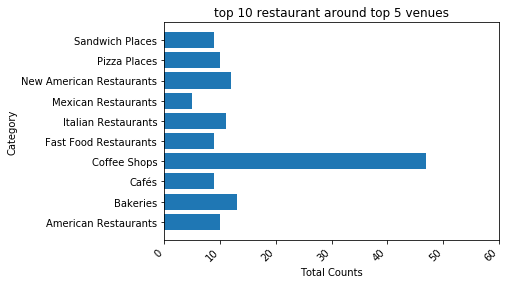

In [20]:
data = restaurant.groupby('category')['name'].count().reset_index()
data = data.rename(columns={'name':'count'})
data.head()
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.barh(data['category'], data['count'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 60], xlabel='Total Counts', ylabel='Category',
       title='top 10 restaurant around top 5 venues')
plt.show()

### Total number of restaurant around top 5 venues

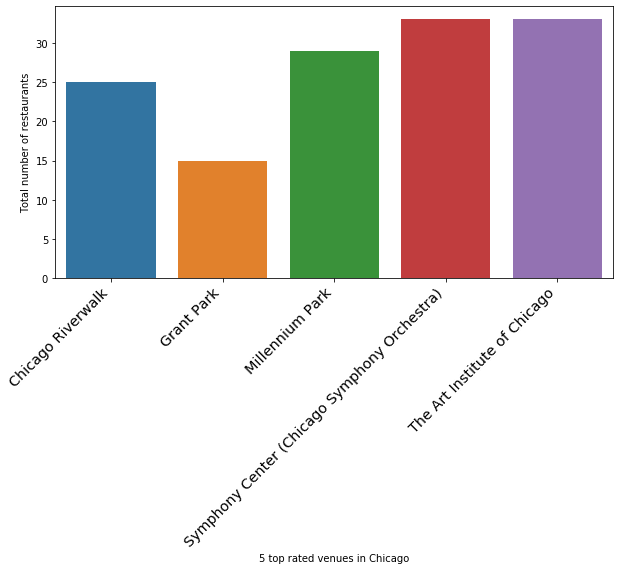

In [23]:
temp_data = restaurant.groupby('venue_name').count().reset_index()
temp_data=temp_data.rename(columns={'name':'count'})
temp_data.head(200)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
chart=sns.barplot(x='venue_name', y='count',data=temp_data)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.xlabel("5 top rated venues in Chicago")
plt.ylabel('Total number of restaurants')
plt.show()


## 3 Analysis on each of venues

### To know about the top 10 restaurant of each venues we proceed as follows
Create a data-frame with pandas one hot encoding for the venue categories.
Use pandas groupby on the District column and obtain the mean of the one-hot encoded venue categories.
Transpose the data-frame at step 2 and arrange in descending order.

In [25]:
# one hot encoding
restaurant_onehot = pd.get_dummies(restaurant[['category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
restaurant_onehot['venue_name'] = restaurant['venue_name'] 

# move neighborhood column to the first column
fixed_columns = [restaurant_onehot.columns[-1]] + list(restaurant_onehot.columns[:-1])
restaurant_onehot = restaurant_onehot[fixed_columns]

restaurant_grouped = restaurant_onehot.groupby('venue_name').mean().reset_index()
restaurant_grouped.head()

,venue_name,American Restaurants,Bakeries,Cafés,Coffee Shops,Fast Food Restaurants,Italian Restaurants,Mexican Restaurants,New American Restaurants,Pizza Places,Sandwich Places
0,Chicago Riverwalk,0.120000,0.040000,0.080000,0.320000,0.040000,0.120000,0.000000,0.160000,0.120000,0.000000
1,Grant Park,0.000000,0.066667,0.200000,0.266667,0.000000,0.133333,0.000000,0.000000,0.066667,0.266667
2,Millennium Park,0.103448,0.103448,0.068966,0.310345,0.068966,0.068966,0.034483,0.068966,0.068966,0.103448
3,Symphony Center (Chicago Symphony Orchestra),0.060606,0.121212,0.030303,0.393939,0.090909,0.060606,0.060606,0.090909,0.060606,0.030303
4,The Art Institute of Chicago,0.060606,0.121212,0.030303,0.393939,0.090909,0.060606,0.060606,0.090909,0.060606,0.030303


In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['venue_name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['venue_name'] = restaurant_grouped['venue_name']

for ind in np.arange(restaurant_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(restaurant_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,venue_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chicago Riverwalk,Coffee Shops,New American Restaurants,Pizza Places,Italian Restaurants,American Restaurants,Cafés,Fast Food Restaurants,Bakeries,Sandwich Places,Mexican Restaurants
1,Grant Park,Sandwich Places,Coffee Shops,Cafés,Italian Restaurants,Pizza Places,Bakeries,New American Restaurants,Mexican Restaurants,Fast Food Restaurants,American Restaurants
2,Millennium Park,Coffee Shops,Sandwich Places,Bakeries,American Restaurants,Pizza Places,New American Restaurants,Italian Restaurants,Fast Food Restaurants,Cafés,Mexican Restaurants
3,Symphony Center (Chicago Symphony Orchestra),Coffee Shops,Bakeries,New American Restaurants,Fast Food Restaurants,Pizza Places,Mexican Restaurants,Italian Restaurants,American Restaurants,Sandwich Places,Cafés
4,The Art Institute of Chicago,Coffee Shops,Bakeries,New American Restaurants,Fast Food Restaurants,Pizza Places,Mexican Restaurants,Italian Restaurants,American Restaurants,Sandwich Places,Cafés


### Get the top 5 restaurant for each venues


In [27]:
num_top_venues = 5

for hood in restaurant_grouped['venue_name']:
    print("----"+hood+"----")
    temp = restaurant_grouped[restaurant_grouped['venue_name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Chicago Riverwalk----
                      venue  freq
0              Coffee Shops  0.32
1  New American Restaurants  0.16
2      American Restaurants  0.12
3       Italian Restaurants  0.12
4              Pizza Places  0.12


----Grant Park----
                 venue  freq
0         Coffee Shops  0.27
1      Sandwich Places  0.27
2                Cafés  0.20
3  Italian Restaurants  0.13
4             Bakeries  0.07


----Millennium Park----
                  venue  freq
0          Coffee Shops  0.31
1  American Restaurants  0.10
2              Bakeries  0.10
3       Sandwich Places  0.10
4                 Cafés  0.07


----Symphony Center (Chicago Symphony Orchestra)----
                      venue  freq
0              Coffee Shops  0.39
1                  Bakeries  0.12
2     Fast Food Restaurants  0.09
3  New American Restaurants  0.09
4      American Restaurants  0.06


----The Art Institute of Chicago----
                      venue  freq
0              Coffee Shops  0.39
1  

### 4. Cluster Venues

In [28]:
# set number of clusters
kclusters = 3

restaurant_grouped_clustering = restaurant_grouped.drop('venue_name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(restaurant_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 0, 0, 0], dtype=int32)

In [29]:


# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

restaurant_merged = restaurant

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
restaurant_merged = restaurant_merged.join(venues_sorted.set_index('venue_name'), on='venue_name')

restaurant_merged.head(20) # check the last columns!

,score,category,name,address,latitude,longitude,venue_name,venue_latitude,venue_longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,7.8,Coffee Shops,Starbucks,8 N. Michigan Avenue,41.882478,-87.624701,Millennium Park,41.882627,-87.623336,0,Coffee Shops,Sandwich Places,Bakeries,American Restaurants,Pizza Places,New American Restaurants,Italian Restaurants,Fast Food Restaurants,Cafés,Mexican Restaurants
1,8.1,American Restaurants,Remington's,20 N Michigan Ave,41.882628,-87.624608,Millennium Park,41.882627,-87.623336,0,Coffee Shops,Sandwich Places,Bakeries,American Restaurants,Pizza Places,New American Restaurants,Italian Restaurants,Fast Food Restaurants,Cafés,Mexican Restaurants
2,8.2,Bakeries,Panera Bread,2 N Michigan Ave,41.882273,-87.624795,Millennium Park,41.882627,-87.623336,0,Coffee Shops,Sandwich Places,Bakeries,American Restaurants,Pizza Places,New American Restaurants,Italian Restaurants,Fast Food Restaurants,Cafés,Mexican Restaurants
5,9.2,New American Restaurants,Cindy's,12 S Michigan Ave,41.881695,-87.624600,Millennium Park,41.882627,-87.623336,0,Coffee Shops,Sandwich Places,Bakeries,American Restaurants,Pizza Places,New American Restaurants,Italian Restaurants,Fast Food Restaurants,Cafés,Mexican Restaurants
6,8.7,Bakeries,Toni Patisserie & Café,65 E Washington St,41.883237,-87.625362,Millennium Park,41.882627,-87.623336,0,Coffee Shops,Sandwich Places,Bakeries,American Restaurants,Pizza Places,New American Restaurants,Italian Restaurants,Fast Food Restaurants,Cafés,Mexican Restaurants
8,6.1,Fast Food Restaurants,Burger King,151 E Randolph St,41.884864,-87.624064,Millennium Park,41.882627,-87.623336,0,Coffee Shops,Sandwich Places,Bakeries,American Restaurants,Pizza Places,New American Restaurants,Italian Restaurants,Fast Food Restaurants,Cafés,Mexican Restaurants
9,9.0,American Restaurants,Cherry Circle Room,12 S Michigan Ave,41.881994,-87.625050,Millennium Park,41.882627,-87.623336,0,Coffee Shops,Sandwich Places,Bakeries,American Restaurants,Pizza Places,New American Restaurants,Italian Restaurants,Fast Food Restaurants,Cafés,Mexican Restaurants
10,7.7,Coffee Shops,Starbucks,151 N. Michigan Ave.,41.885120,-87.624106,Millennium Park,41.882627,-87.623336,0,Coffee Shops,Sandwich Places,Bakeries,American Restaurants,Pizza Places,New American Restaurants,Italian Restaurants,Fast Food Restaurants,Cafés,Mexican Restaurants
11,7.9,Pizza Places,Pizano's Pizza,61 E Madison St.,41.882031,-87.625642,Millennium Park,41.882627,-87.623336,0,Coffee Shops,Sandwich Places,Bakeries,American Restaurants,Pizza Places,New American Restaurants,Italian Restaurants,Fast Food Restaurants,Cafés,Mexican Restaurants
12,6.4,Italian Restaurants,Sopraffina,200 E Randolph,41.884769,-87.621539,Millennium Park,41.882627,-87.623336,0,Coffee Shops,Sandwich Places,Bakeries,American Restaurants,Pizza Places,New American Restaurants,Italian Restaurants,Fast Food Restaurants,Cafés,Mexican Restaurants


## Creat a map to visualize the clusters


In [31]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(restaurant_merged['latitude'], restaurant_merged['longitude'], restaurant_merged['category'], restaurant_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 5 top visited sites of Chicago segmented into 3 clusters based on the most common venues. The size of the circles represents number of restaurants as most common venues for each district, which is highest at Millennium Park and lowest at Grant park as shown in above map.

## 5. Results and Discussion

This section brings the end of the analysis, where we got some understanding of the top 5 visited sites of Chicago and, as the business problem started with benefits and drawbacks of opening a restaurant in one of the top visited sites. Let's first summarize what we have found out:
1. Coffee Shop top the charts of most common venues in the top 5 visited sites. 
2. The art institute of Chicago and symphony center have most number of restaurants around.
3. Since the clustering was based only on the most common venues of each site, Millennium Park,The Art Institute of Chicago, Symphony Center fall under the same cluster.  Grant Park and Chicago Riverwalk, are separated from both of these clusters as, American food  and Sandwichs stand out as the most common venue (with a very high frequency).

Some drawbacks of this analysis are — the clustering is completely based on the most common venues obtained from Foursquare data, this analysis has its limitations due to that the data exploration was mostly concentrated on the restaurants, some other factors say the real state price, distance of the venues from closest public stations, number of potential customers, benefits being a port region, could all play a major role and thus, this analysis is definitely far from being conclusory. 
However, it certainly gives us some very preliminary hint on possibilities of opening restaurants around the top rated sites of Chicago. Also, data set maybe not enough to provide strong evidence. Furthermore, the machine learning model is too simple, this results also could potentially vary if we use some other clustering techniques like DBSCAN.

To summarize, I have practiced the data science project and master the skills to scrap dataset from web, go through detailed data analysis and evaluate the machine learning models to explore the restaurant around top visited sites of Chicago and presenting the results of segmentation of districts using Folium leaflet map. I have discussed the potential application of this kind of analysis in a real life business problem. Moreover, some of the drawbacks and chance for improvements to deal with even more realistic pictures are well discussed. 